In [1]:
import pandas as pd
import numpy as np 

In [14]:
df = pd.read_csv('Data.csv')
df.head()
df.info()
category_list = df['category'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder
ce = LabelEncoder() 
df['category'] = ce.fit_transform(df['category'])

In [16]:
df2 =df.loc[0:49999, df.columns.drop(['step','customer','gender','zipMerchant','merchant','zipcodeOri'])]
for i in range(len(df2['age'])):
    if df['age'][i] == "'U'":
        df2 = df2.drop(labels=i, axis=0)
        
df2.dtypes

age          object
category      int64
amount      float64
fraud         int64
dtype: object

In [17]:
import re

In [18]:
df2['age'] = df2['age'].str.replace('[^0-9]', '', regex=True).astype(int)

#df2['merchant'] = df2['merchant'].str.sub('[^0-9]', '', regex=True).astype('int64')
#df2['merchant'] = df2['merchant'].replace('[^0-9]', '', regex=True).astype('int64')
#df2['merchant'] = re.sub("M", "0",df['merchant'].to_list()).astype('int64')

In [19]:
# df2['age'] = df2['age'].str.replace('[^0-9]', '', regex=True)

#df2['merchant'] = df2['merchant'].str.sub('[^0-9]', '', regex=True).astype('int64')
#df2['merchant'] = df2['merchant'].replace('[^0-9]', '', regex=True).astype('int64')
#df2['merchant'] = re.sub("M", "0",df['merchant'].to_list()).astype('int64')

In [20]:
df2['age']= df2['age'].astype('int')

In [21]:
df2.describe()

,age,category,amount,fraud
count,49926.000000,49926.000000,49926.000000,49926.000000
mean,3.001682,11.134759,39.904945,0.015503
std,1.330011,2.755710,130.796801,0.123543
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,12.000000,13.802500,0.000000
50%,3.000000,12.000000,26.980000,0.000000
75%,4.000000,12.000000,42.880000,0.000000
max,6.000000,14.000000,7432.480000,1.000000


In [30]:
from keras import Sequential, Model, Input,regularizers
from keras import layers
from keras.regularizers import l2
from keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [23]:
X = df2.drop(['fraud'],axis=1).values
Y = df2[['fraud']].values

df2.dtypes

age           int64
category      int64
amount      float64
fraud         int64
dtype: object

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=4)

In [25]:
model=Sequential()
model.add(Dense(3,activation="relu",input_shape=(3,)))
model.add(Dense(units=2,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 23
Trainable params: 23
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer = 'Adam', loss="binary_crossentropy",metrics=["accuracy"])

In [27]:
history = model.fit(x_train,y_train,batch_size=1000,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
40/40 [==============================] - 1s 7ms/step - loss: 0.4496 - accuracy: 0.9850 - val_loss: 0.3394 - val_accuracy: 0.9824
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9850 - val_loss: 0.1004 - val_accuracy: 0.9824
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9850 - val_loss: 0.0856 - val_accuracy: 0.9824
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9850 - val_loss: 0.0772 - val_accuracy: 0.9824
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9850 - val_loss: 0.0716 - val_accuracy: 0.9824
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9850 - val_loss: 0.0679 - val_accuracy: 0.9824
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9850 - val_loss: 0.0649 - val_accuracy: 0.9824
Epoch 8/50
40/40 [==

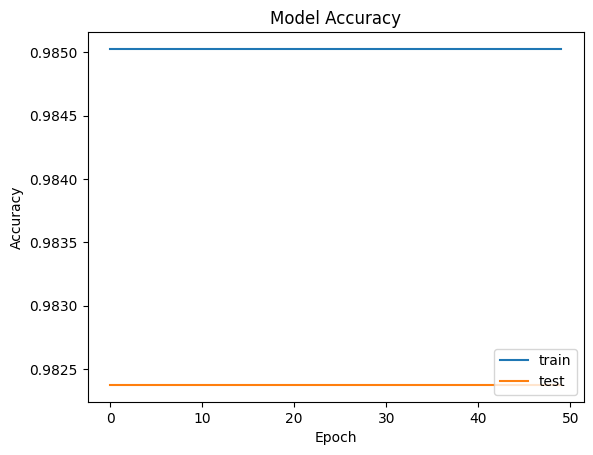

In [28]:
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.title('Model Accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['train','test'],loc='lower right')
pyplot.show()

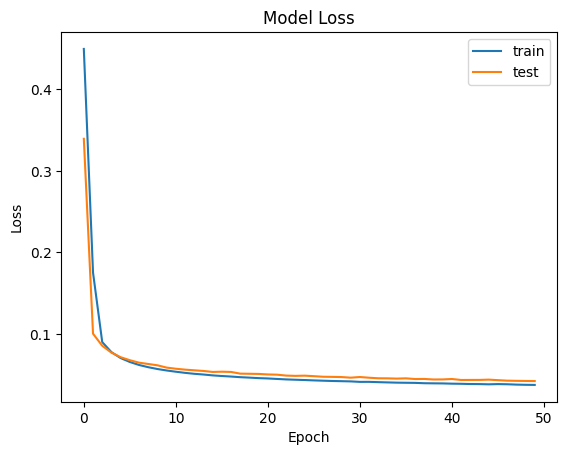

In [29]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title('Model Loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend()
pyplot.show()